In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_set=pd.read_excel('train_set.xlsx')
pd.set_option('display.max_columns',None)

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from scipy.stats import shapiro,mannwhitneyu


In [ ]:
train_set.head()

,Unnamed: 0,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,3112,Direct Traffic,No,1.098612,20.297783,1.098612,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,Yes,Email Opened,0
1,8413,Organic Search,No,1.791759,39.127995,1.791759,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,15,0.052632,Yes,SMS Sent,1
2,2961,Reference,No,1.386294,35.327043,0.693147,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,14,0.047619,Yes,Email Opened,1
3,24,Google,No,1.945910,33.719431,0.916291,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,14,0.052632,Yes,Email Opened,1
4,2740,Organic Search,No,1.386294,31.670175,1.386294,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,No,Email Opened,0


In [ ]:
train_set=train_set.drop('Unnamed: 0',axis=1)

In [ ]:
train_set.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,Direct Traffic,No,1.098612,20.297783,1.098612,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,Yes,Email Opened,0
1,Organic Search,No,1.791759,39.127995,1.791759,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,15,0.052632,Yes,SMS Sent,1
2,Reference,No,1.386294,35.327043,0.693147,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,14,0.047619,Yes,Email Opened,1
3,Google,No,1.945910,33.719431,0.916291,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,14,0.052632,Yes,Email Opened,1
4,Organic Search,No,1.386294,31.670175,1.386294,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,No,Email Opened,0


In [ ]:
X_train=train_set.drop('Converted',axis=1)
X_train.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,Direct Traffic,No,1.098612,20.297783,1.098612,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,Yes,Email Opened
1,Organic Search,No,1.791759,39.127995,1.791759,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,15,0.052632,Yes,SMS Sent
2,Reference,No,1.386294,35.327043,0.693147,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,14,0.047619,Yes,Email Opened
3,Google,No,1.945910,33.719431,0.916291,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,14,0.052632,Yes,Email Opened
4,Organic Search,No,1.386294,31.670175,1.386294,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,No,Email Opened


In [ ]:
y_train=train_set['Converted']

In [ ]:
y_train

0       0
1       1
2       1
3       1
4       0
       ..
6463    0
6464    1
6465    1
6466    0
6467    1
Name: Converted, Length: 6468, dtype: int64

In [ ]:
cat_cols=X_train.select_dtypes(include=['object']).columns

In [ ]:
num_cols=X_train.select_dtypes(include=[np.number]).columns

In [ ]:
X_train[num_cols]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,1.098612,20.297783,1.098612,14,0.058824
1,1.791759,39.127995,1.791759,15,0.052632
2,1.386294,35.327043,0.693147,14,0.047619
3,1.945910,33.719431,0.916291,14,0.052632
4,1.386294,31.670175,1.386294,14,0.058824
...,...,...,...,...,...
6463,1.386294,10.000000,0.916291,14,0.058824
6464,1.609438,7.280110,1.098612,14,0.058824
6465,0.000000,0.000000,0.000000,15,0.062500
6466,1.945910,13.038405,1.386294,14,0.055556


In [ ]:
X_train[cat_cols]

,Lead Source,Do Not Email,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,Direct Traffic,No,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,Yes,Email Opened
1,Organic Search,No,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,Yes,SMS Sent
2,Reference,No,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened
3,Google,No,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened
4,Organic Search,No,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Google,No,Email Responded,India,unknown,unknown,Not Disclosed,Others,Status Unknown,Not Sure,Unknown,Unknown,Medium,Medium,No,Email Opened
6464,Direct Traffic,No,SMS Reverted,India,Logistics,Student of SomeSchool,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier3,Medium,Medium,No,SMS Sent
6465,Olark Chat,No,Email Responded,unknown,unknown,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Unknown,Medium,Medium,No,Email Opened
6466,Organic Search,No,Email Unsubscribed,India,E-Business,unknown,Not Disclosed,Others,Status Unknown,Not Sure,Unknown,Tier3,Medium,High,Yes,Unreachable


# Checking relationship of categorical columns with the target on the basis of appropriate statistical tests (Bivariate analysis)

In [ ]:
# do tests for categorical columns

In [ ]:
p_values=[]

for i in cat_cols:
    ct=pd.crosstab(X_train[i],y_train)
    p_value=chi2_contingency(ct)[1]
    p_values.append(p_value)

In [ ]:
p_values

[4.13505266559678e-133,
 4.738865104455306e-28,
 4.029000864709554e-194,
 5.95053368048728e-06,
 2.1810819495595e-34,
 0.0027190024528637516,
 2.831539686196306e-250,
 9.151543099381976e-157,
 0.0,
 0.0,
 8.53440352697686e-222,
 9.305526228984487e-08,
 8.18239703452781e-28,
 1.1321891796463588e-16,
 0.0010643495294842857,
 2.4441781215996164e-184]

In [ ]:
pd.DataFrame({'cat_columns':list(cat_cols),'p_values':p_values})

,cat_columns,p_values
0,Lead Source,4.135053e-133
1,Do Not Email,4.738865e-28
2,Last Activity,4.029001e-194
3,Country,5.950534e-06
4,Specialization,2.181082e-34
5,How did you hear about X Education,2.719002e-03
6,What is your current occupation,2.831540e-250
7,What matters most to you in choosing a course,9.151543e-157
8,Tags,0.000000e+00
9,Lead Quality,0.000000e+00


# visualizing for categorical columns

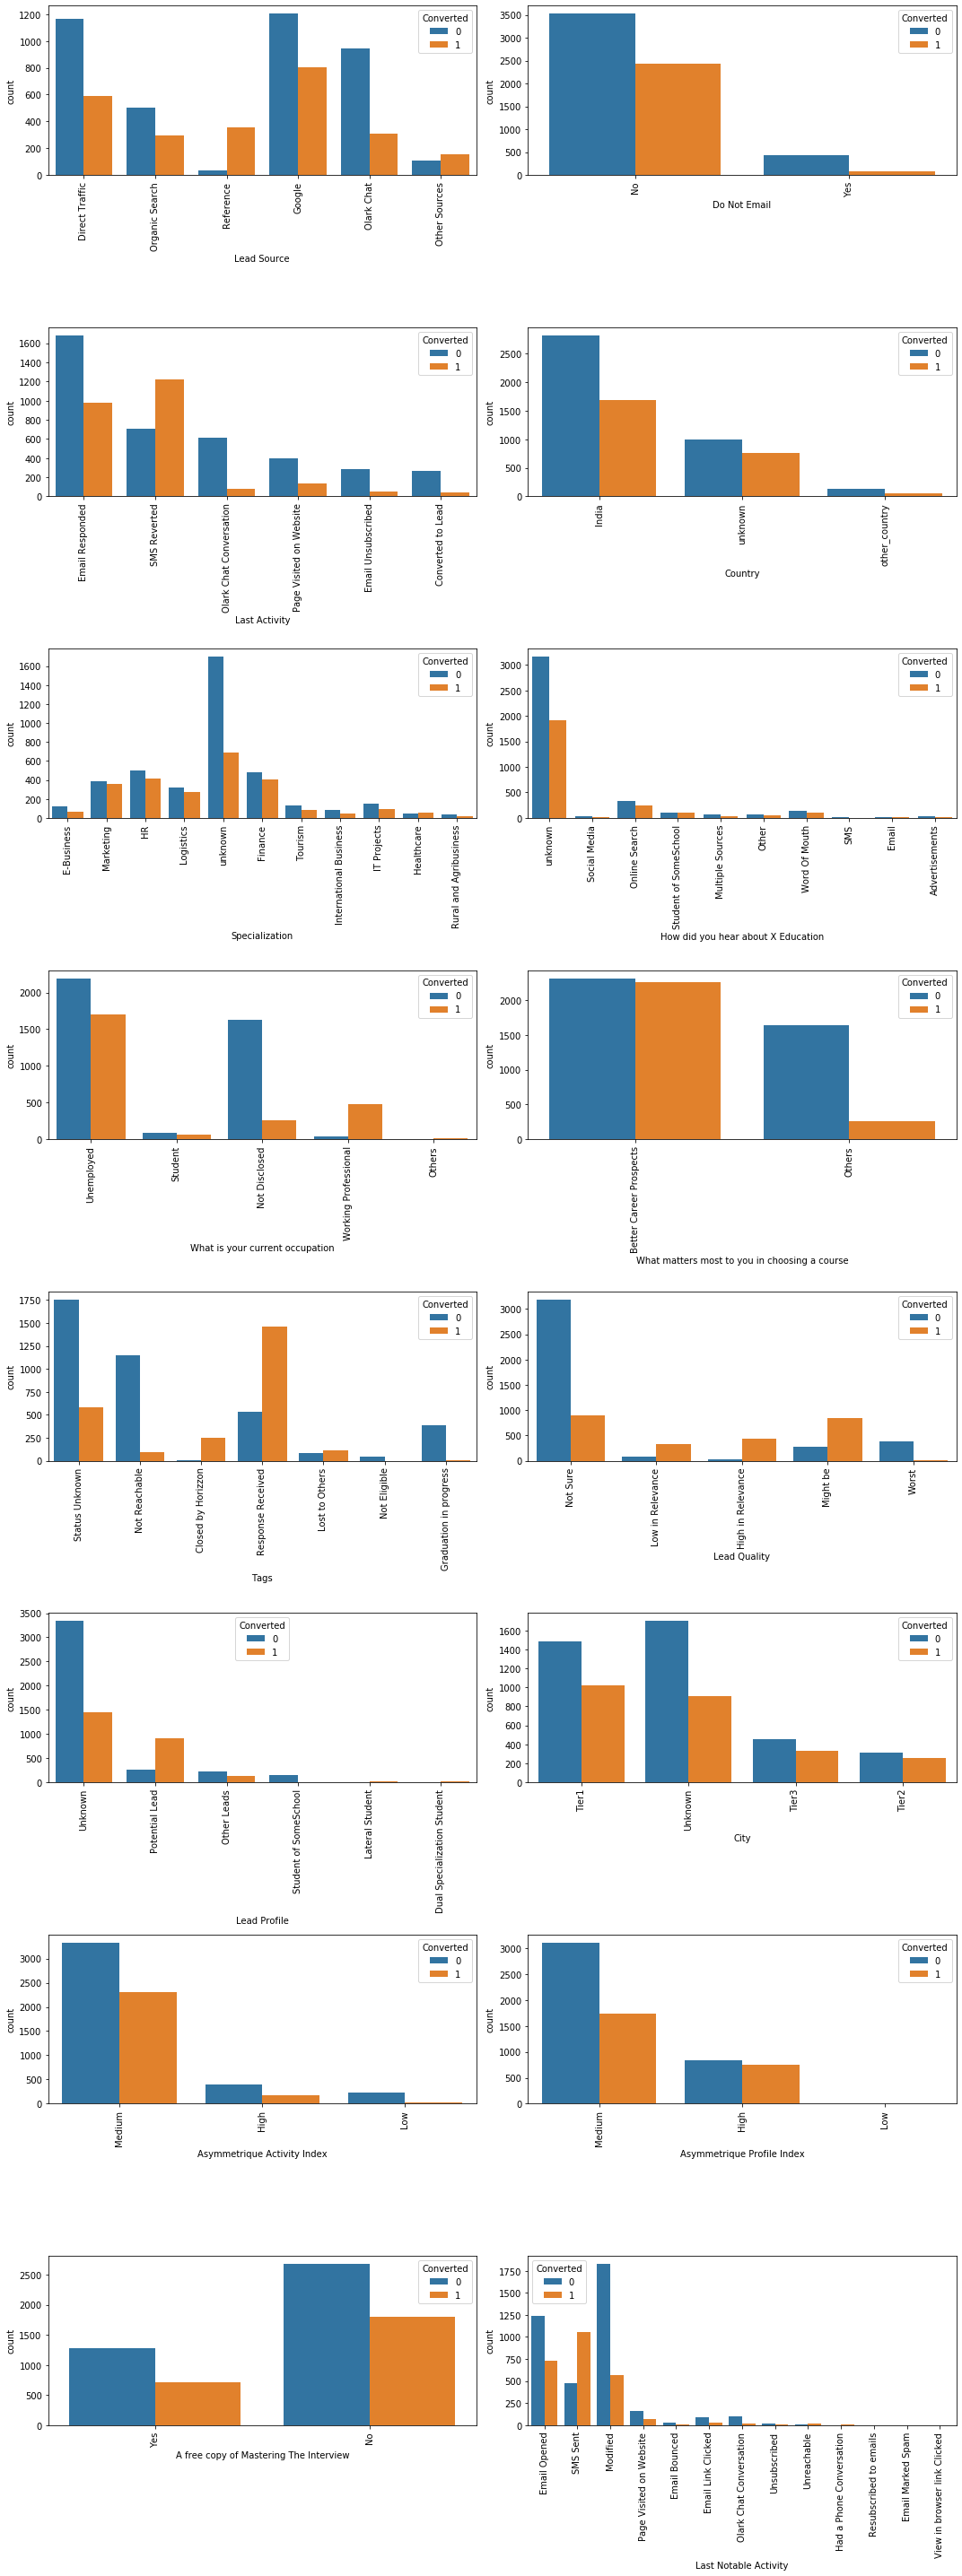

In [ ]:
plt.figure(figsize=(15,40))
for i,j in enumerate(cat_cols,1):
    

    plt.subplot(8,2,i)
    sns.countplot(X_train[j],hue=y_train)
    plt.xticks(rotation=90)
plt.tight_layout()


# Conclusion for categorical columns

# since all p_values are < 0.05 => we can say that all my categorical columns are having relationship with the target variable.

# checking for variance for each numerical feature (Univariate analysis)

In [ ]:
for i in num_cols:
    print('variance of column {} ='.format(i),' ',X_train[i].var())

variance of column TotalVisits =   0.6321650428480624
variance of column Total Time Spent on Website =   192.3914012409157
variance of column Page Views Per Visit =   0.43606870385195484
variance of column Asymmetrique Activity Score =   1.0548834389597883
variance of column Asymmetrique Profile Score =   2.023924764822011e-05


# Leaving Total Time Spent on Website rest of all the numerical features are showing low variance.

# checking relation between each numerical column and target (Bivariate analysis)

In [ ]:
# checking relationship for column TotalVisits with target

In [ ]:
# 1st we will do normality test

p_value= 6.926618309157571e-42


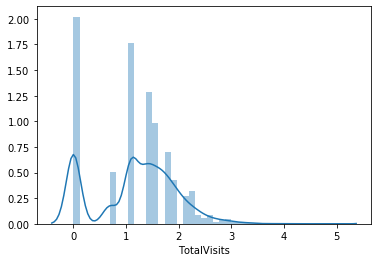

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['TotalVisits'])
print('p_value=',shapiro(train_set[train_set['Converted']==0]['TotalVisits'])[1])

p_value= 3.4477676335706517e-38


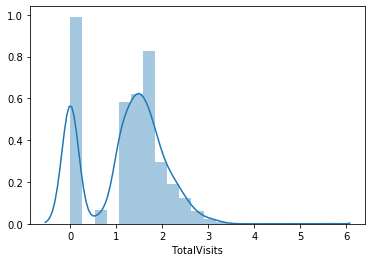

In [ ]:
sns.distplot(train_set[train_set['Converted']==1]['TotalVisits'])
print('p_value=',shapiro(train_set[train_set['Converted']==1]['TotalVisits'])[1])

In [ ]:
# since p value is < 0.05 => our sample data is not normally distributed => we will go with non parametric test

In [ ]:
mannwhitneyu(train_set[train_set['Converted']==1]['TotalVisits'],train_set[train_set['Converted']==0]['TotalVisits'])

MannwhitneyuResult(statistic=4759231.5, pvalue=0.001743130890003308)

In [ ]:
# since p value < 0.05 => TotalVisits is significant feature

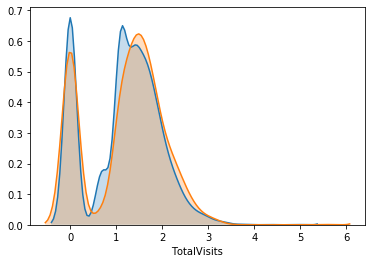

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['TotalVisits'],kde_kws={'shade':True},hist=False)
sns.distplot(train_set[train_set['Converted']==1]['TotalVisits'],kde_kws={'shade':True},hist=False)
plt.show()

# from the above plot also we can see that column Page Views Per Visit is not able to distinguish the classes in our target feature. So it is insignificant. 

In [ ]:
# checking relationship for column Total Time Spent on Website with target

In [ ]:
# 1st we will do normality test

p_value= 3.811671952809935e-41


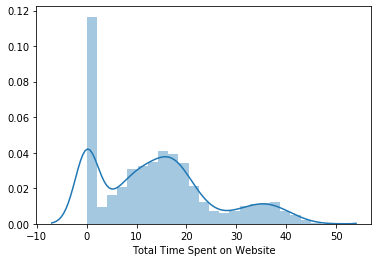

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Total Time Spent on Website'])
print('p_value=',shapiro(train_set[train_set['Converted']==0]['Total Time Spent on Website'])[1])

p_value= 4.90454462513686e-44


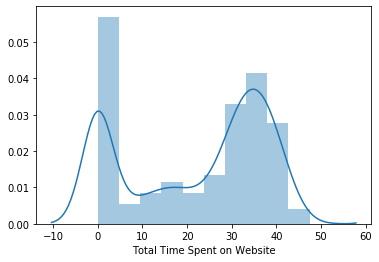

In [ ]:
sns.distplot(train_set[train_set['Converted']==1]['Total Time Spent on Website'])
print('p_value=',shapiro(train_set[train_set['Converted']==1]['Total Time Spent on Website'])[1])

In [ ]:
# since p value is < 0.05 => our sample data is not normally distributed => we will go with non parametric test

In [ ]:
mannwhitneyu(train_set[train_set['Converted']==1]['Total Time Spent on Website'],train_set[train_set['Converted']==0]['Total Time Spent on Website'])

MannwhitneyuResult(statistic=3494823.5, pvalue=6.143277738507575e-92)

In [ ]:
# since p value < 0.05 => Total Time Spent on Website is significant feature

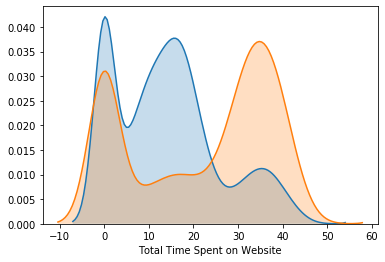

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Total Time Spent on Website'],kde_kws={'shade':True},hist=False)
sns.distplot(train_set[train_set['Converted']==1]['Total Time Spent on Website'],kde_kws={'shade':True},hist=False)
plt.show()

# from the above plot also we can see that column Total Time Spent on Website is able to distinguish the classes in our target feature. So it is significant. 

In [ ]:
# checking relationship for column Page Views Per Visit with target

In [ ]:
# 1st we will do normality test

p_value= 7.847271400218976e-44


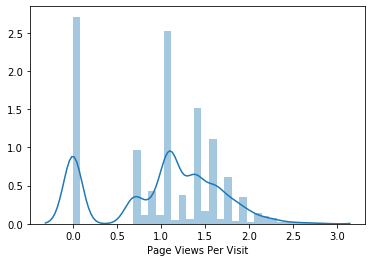

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Page Views Per Visit'])
print('p_value=',shapiro(train_set[train_set['Converted']==0]['Page Views Per Visit'])[1])

p_value= 3.200073836756904e-39


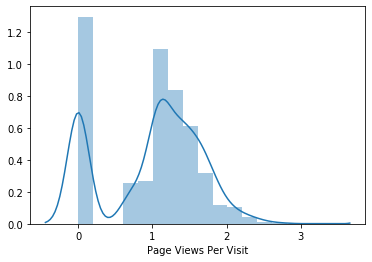

In [ ]:
sns.distplot(train_set[train_set['Converted']==1]['Page Views Per Visit'])
print('p_value=',shapiro(train_set[train_set['Converted']==1]['Page Views Per Visit'])[1])

In [ ]:
# since p value is < 0.05 => our sample data is not normally distributed => we will go with non parametric test

In [ ]:
mannwhitneyu(train_set[train_set['Converted']==1]['Page Views Per Visit'],train_set[train_set['Converted']==0]['Page Views Per Visit'])

MannwhitneyuResult(statistic=4950328.0, pvalue=0.39167679027035596)

In [ ]:
# since p value < 0.05 => Page Views Per Visit is not a significant feature. So we will drop it.

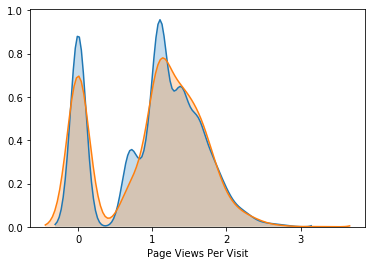

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Page Views Per Visit'],kde_kws={'shade':True},hist=False)
sns.distplot(train_set[train_set['Converted']==1]['Page Views Per Visit'],kde_kws={'shade':True},hist=False)
plt.show()

# from the above plot also we can see that column Page Views Per Visit is not able to distinguish the classes in our target feature. So it is insignificant. 

In [ ]:
# checking relationship for column Asymmetrique Activity Score with target

In [ ]:
# 1st we will do normality test

p_value= 0.0


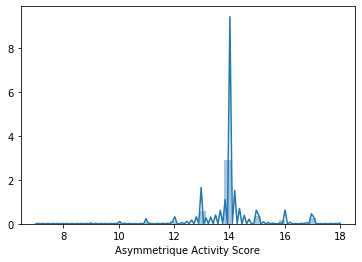

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Asymmetrique Activity Score'])
print('p_value=',shapiro(train_set[train_set['Converted']==0]['Asymmetrique Activity Score'])[1])

p_value= 0.0


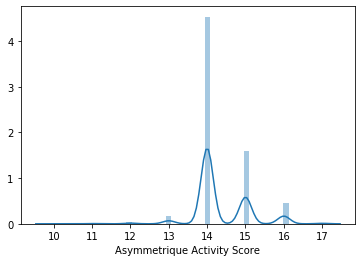

In [ ]:
sns.distplot(train_set[train_set['Converted']==1]['Asymmetrique Activity Score'])
print('p_value=',shapiro(train_set[train_set['Converted']==1]['Asymmetrique Activity Score'])[1])

In [ ]:
# since p value is < 0.05 => our sample data is not normally distributed => we will go with non parametric test

In [ ]:
mannwhitneyu(train_set[train_set['Converted']==1]['Asymmetrique Activity Score'],train_set[train_set['Converted']==0]['Asymmetrique Activity Score'])

MannwhitneyuResult(statistic=3941748.0, pvalue=1.1660506353677145e-61)

In [ ]:
# since p value < 0.05 => Asymmetrique Activity Score is significant feature

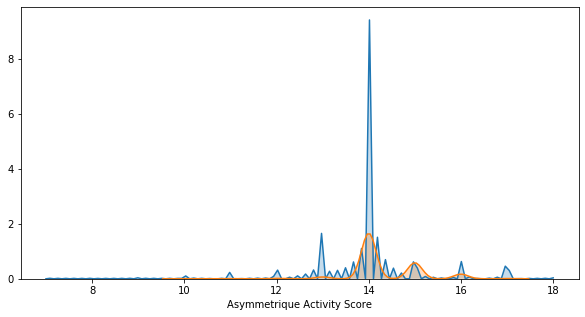

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train_set[train_set['Converted']==0]['Asymmetrique Activity Score'],kde_kws={'shade':True},hist=False)
sns.distplot(train_set[train_set['Converted']==1]['Asymmetrique Activity Score'],kde_kws={'shade':True},hist=False)
plt.show()

# from the above plot also we can see that column Asymmetrique Activity Score is not able to distinguish the classes in our target feature. So it is insignificant.  

In [ ]:
# checking relationship for column Asymmetrique Profile Score with target

In [ ]:
# 1st we wil do normality test

p_value= 0.0


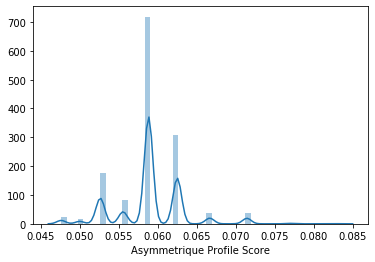

In [ ]:
sns.distplot(train_set[train_set['Converted']==0]['Asymmetrique Profile Score'])
print('p_value=',shapiro(train_set[train_set['Converted']==0]['Asymmetrique Profile Score'])[1])

p_value= 4.974609548353101e-43


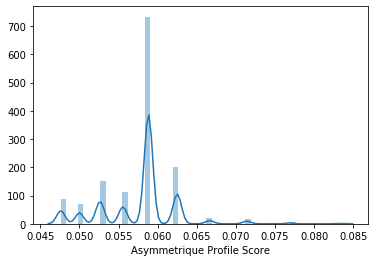

In [ ]:
sns.distplot(train_set[train_set['Converted']==1]['Asymmetrique Profile Score'])
print('p_value=',shapiro(train_set[train_set['Converted']==1]['Asymmetrique Profile Score'])[1])

In [ ]:
# since p value is < 0.05 => our sample data is not normally distributed => we will go with non parametric test

In [ ]:
mannwhitneyu(train_set[train_set['Converted']==1]['Asymmetrique Profile Score'],train_set[train_set['Converted']==0]['Asymmetrique Profile Score'])

MannwhitneyuResult(statistic=4185744.0, pvalue=1.973631387430449e-31)

In [ ]:
# since p value < 0.05 => Asymmetrique Activity Score is significant feature

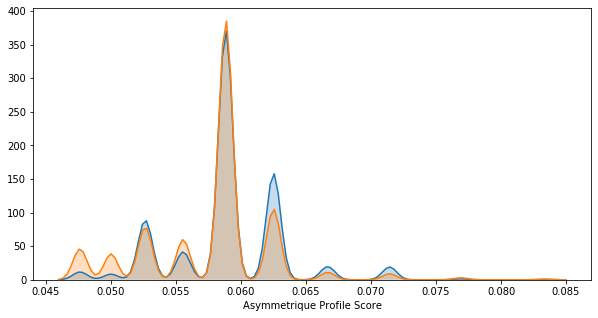

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train_set[train_set['Converted']==0]['Asymmetrique Profile Score'],kde_kws={'shade':True},hist=False)
sns.distplot(train_set[train_set['Converted']==1]['Asymmetrique Profile Score'],kde_kws={'shade':True},hist=False)
plt.show()

# from the above plot also we can see that column Asymmetrique Profile Score is not able to distinguish the classes in our target feature. So it is insignificant. 

# Conclusions on numerical Columns

#  1st for TotalVisits

=> 1) variance= 0.6321650428480624 => variance is low and it carries no information. So it is insignificant.

=> 2) from the plot we can see that column TotalVisits is not able to distinguish the classes in our target feature. So it is insignificant.

=> 3) statistically it is coming significant.

On the basis of points 1 and 2 => we can drop this feature.

# 2nd for Total Time Spent on Website

=> 1) variance of column Total Time Spent on Website =  192.3914012409157 => variance is high and it carries information. So it is significant.

=> 2) from the plot for this column we can see that Total Time Spent on Website is able to distinguish clearly between the classes in our target feature. So it is significant.

=> 3) statistically it is coming significant.

On the basis of points 1,2 and 3 => we need to keep this feature

# 3rd for Page Views Per Visit

=> 1) variance of column Page Views Per Visit =   0.43606870385195484 => variance is low and it carries no information. So it is insignificant.

=> 2) from the plot we can see that column Page Views Per Visit is not able to distinguish between the classes in our target feature. So it is insignificant.

=> 3) statistically it is insignificant.

On the basis of points 1,2 and 3 => we need to drop this feature

# 4th for Asymmetrique Activity Score

=> 1) variance of column Asymmetrique Activity Score =   1.0548834389597883 => variance is low and it carries no information. So it is insignificant.

=> 2) from the plot we can see that column Asymmetrique Activity Score is not able to distinguish between the classes in our target feature. So it is insignificant.

=> 3) Statistically it is significant

On the basis of points 1 and 2 => we can drop this feature.

# 5th for Asymmetrique Profile Score

=> 1) variance of column Asymmetrique Profile Score =   2.023924764822011e-05 => variance is very low and it carries no information. So it is insignificant.

=> 2) from the plot we can see that column Asymmetrique Profile Score is not able to distinguish between the classes in our target feature. So it is insignificant.

=> 3) statistically it is insignificant.

On the basis of points 1 and 2 => we can drop this feature.

# Checking correlation between numerical columns (Multivariate analysis)

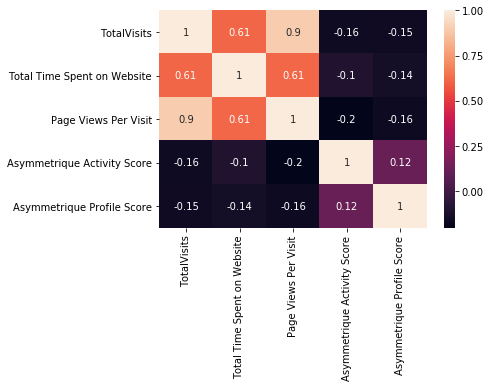

In [ ]:
sns.heatmap(X_train[num_cols].corr(),annot=True)

# from the above plot we can say that => 
1) TotalVisits and Total time spent on website is having high +ve correlation.
2) Page views per visit and Total time spent on website is having high +ve correlation.

# Atlast dropping all irrelevant columns

In [ ]:
X_train=X_train.drop(['TotalVisits','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [ ]:
# dropping same columns in the test dataset

In [ ]:
test_set=pd.read_excel('test_set.xlsx')
pd.set_option('display.max_columns',None)

In [ ]:
test_set.head()

,Unnamed: 0,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,567,Google,No,1.609438,18.220867,1.609438,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.062500,No,Email Opened,0
1,2303,Google,No,1.098612,39.395431,1.098612,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,14,0.052632,No,Modified,0
2,1523,Google,No,1.386294,36.660606,1.386294,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,13,0.076923,No,Email Opened,0
3,6923,Google,No,1.791759,13.674794,1.791759,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,14,0.058824,No,Email Opened,0
4,7841,Google,No,1.098612,26.495283,1.098612,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,13,0.055556,No,Email Opened,0


In [ ]:
test_set=test_set.drop('Unnamed: 0',axis=1)

In [ ]:
test_set.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,Google,No,1.609438,18.220867,1.609438,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.062500,No,Email Opened,0
1,Google,No,1.098612,39.395431,1.098612,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,14,0.052632,No,Modified,0
2,Google,No,1.386294,36.660606,1.386294,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,13,0.076923,No,Email Opened,0
3,Google,No,1.791759,13.674794,1.791759,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,14,0.058824,No,Email Opened,0
4,Google,No,1.098612,26.495283,1.098612,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,13,0.055556,No,Email Opened,0


In [ ]:
X_test=test_set.drop('Converted',axis=1)
X_test.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,Google,No,1.609438,18.220867,1.609438,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.062500,No,Email Opened
1,Google,No,1.098612,39.395431,1.098612,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,14,0.052632,No,Modified
2,Google,No,1.386294,36.660606,1.386294,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,13,0.076923,No,Email Opened
3,Google,No,1.791759,13.674794,1.791759,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,14,0.058824,No,Email Opened
4,Google,No,1.098612,26.495283,1.098612,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,13,0.055556,No,Email Opened


In [ ]:
y_test=test_set['Converted']

In [ ]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
2767    0
2768    0
2769    0
2770    0
2771    0
Name: Converted, Length: 2772, dtype: int64

In [ ]:
X_test=X_test.drop(['TotalVisits','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [ ]:
len(X_train.columns)

17

In [ ]:
len(X_test.columns)

17